<a href="https://colab.research.google.com/github/SJharbade/DeepLearning/blob/main/01_TensorFlow_NeuralNet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural network with tensorflow

In [ ]:
import tensorflow as tf

# Create Data to View and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create Features( Independent Variables)
X = np.array([-7.0,-4.0,-1.0, 2.0,5.0,8.0,11.0,14.0])
# Create Lables ( Dependent variables)
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

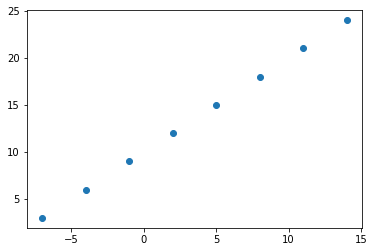

In [ ]:
# Visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10 ### Since we can see the relationship between X and y, we will try to deduce this relationship from the regression

array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input and output shapes

In [ ]:
# create a demo tensor for our housing price predection problem ( This is the example of the tutorial)
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Shape of the example problem that we are doing here
input_shape =X.shape
output_shape = y.shape
input_shape,output_shape
# The output is not making sense as we want to predict y[0] that is 3.0 for the value of X[0] that is -7.0

((8,), (8,))

In [ ]:
# Let's check the shape for the single values of X and y
input_shape =X[0].shape
output_shape = y[0].shape
input_shape,output_shape
# from the putput it seems like our inuput and output has no shapes; this is not possible, this is example of Scalar tensor hence it has no shape, as in below line of code

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# turn our numpy array into tensors
X = tf.constant(X)
y =tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's check the shape of tensors that we created just now
input_shape =X[0].shape
output_shape = y[0].shape
input_shape,output_shape
## In this case how we should build model to predict y[0] for X[0]

(TensorShape([]), TensorShape([]))

## Steps in modelling a tensorflow
1. **Creating a Model** -  Define:
                      i) Input Layer
                      ii) Output Layer
                      iii) hidden Layers of deep learning model
2. **Compiling a Model** -  Define:
          i) Loss Function -The function tells our model how wrong it is
          ii) Optimizer - Tells the model how to improve it's learning
          iii) Evaluation Metrics- To gauage efficency of our model
3. **Fitting the  Model** -  Letting model to find patterns between X and y that is  for features and lables. This steps also involves improvement of models
  Steps for improving models
  1. Tuning of hyperparameters


In [ ]:
# Set the random Seed
tf.random.set_seed(42)

# 1.  Create Model using Sequential API
## we can also use .add function to add dense layer in Sequintal API after defining the model(as defined in tensor flow knowledge Articles)
## and we can pass the list as well, as we have done in below code

model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complile the model

model.compile(loss = tf.keras.losses.mae,# mae Mean Absolute error
              optimizer = tf.keras.optimizers.SGD(),# Stochastic Gradient Descent)
              metrics = ["mae"])

# 3.  Fit the Model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


In [ ]:
# Check out X and y by predicting using our model
y_pred = model.predict([17.0])
y_pred

## We can see model output is not as expected, we should have y =X +10 as output that is 17 +10 = 27....
## And we can see the Loss of 10.9(mae) adding that with out put 12.7 + 10.9 = ~ 23.0 still there is difference in observed value and predicted value

1/1 [==============================] - 0s 65ms/step


array([[12.716021]], dtype=float32)

Improving our Model

In [ ]:
# Let's re-build our model
### 1.  BY increasing number of epochs(hyperparameter)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])
# compile the  model
model.compile(loss =tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics =["mae"])
# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
# Check out X and y by predicting using our New model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 194ms/step


array([[29.739855]], dtype=float32)

In [ ]:
# Let's re-build our model
### 1.  BY changing th optmizer function

# Create Model
model_O = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_O.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["mae"])

# Fit the model
model_O.fit(tf.expand_dims(X, axis =-1),y,epochs =100)

In [ ]:
# Check out X and y by predicting using our New model
y_pred = model_O.predict([17.0])
y_pred

# By changing Optimizer to Adam and epocs to 100 and then 500, we can see there is no effeciency enhanancements
# But efficeny has decreased to considerably

1/1 [==============================] - 0s 42ms/step


array([[14.394114]], dtype=float32)

In [ ]:
# Let's re-build our model
### 1.  BY adding hidden Layers

# Create model
model_hl = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

## Compile Model
model_hl.compile(loss =tf.keras.losses.mae,
                 #optimizer =tf.keras.optimizers.Adam(lr =0.0001),
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics =["mae"])

## Fit the model
model_hl.fit(tf.expand_dims(X, axis =-1),y,epochs =100)

In [ ]:
# Check out X and y by predicting using our New model
y_pred = model_hl.predict([17.0])
y_pred

1/1 [==============================] - 0s 42ms/step


array([[31.727648]], dtype=float32)

In [ ]:
# Let's re-build our model
### 1.  BY adding hidden Layers

# Create model
model_hl = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

## Compile Model
model_hl.compile(loss ="mae", # sme as above code just short form
                 optimizer =tf.keras.optimizers.Adam(lr =0.01),
                 #optimizer = tf.keras.optimizers.SGD(),
                 metrics =["mae"])

## Fit the model
model_hl.fit(tf.expand_dims(X, axis =-1),y,epochs =100)

In [ ]:
y_pred = model_hl.predict([17.0])
y_pred

1/1 [==============================] - 0s 69ms/step


array([[27.324871]], dtype=float32)

## Common Ways to improve deep Learning Models
1. Adding Hidden Layers
2. Increase the number of hidden units ie Dense(10), Dense(50) etc....
3. Change the Activation Function
4. Change the Optimization Function
5. Change the Learning Rate------Most important hyper parameters
6. Fitting on more Data.... increase dataset size
7. Fitting for Longer ie.. increasing epochs ( first thing for tuning)

Evaluating the model